# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Set the DataFrame
we_df = pd.DataFrame({
    "City": cities,
    "Cloudiness": " ",
    "Date": " ",
    "Max Temp": " ",
    "Wind Speed": " ",
    "Lat": " ",
    "Lng": " ",
    "Humidity": " "
})
we_df.head()

,City,Cloudiness,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,punta arenas,,,,,,,
1,mataura,,,,,,,
2,port elizabeth,,,,,,,
3,donghai,,,,,,,
4,namatanai,,,,,,,


In [9]:
for city in cities:
    base_url = "http//api.openweathermap.org/data/2.5/weather?q="
    new_url = base_url + city + "&appid=" + api_key
    print(new_url)

http//api.openweathermap.org/data/2.5/weather?q=punta arenas&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=mataura&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=port elizabeth&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=donghai&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=namatanai&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=rawson&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=fort nelson&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=syracuse&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=hilo&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/2.5/weather?q=tsihombe&appid=abb84acfe3dd96fd69abf202c6803cb1
http//api.openweathermap.org/data/

In [11]:
for index, row in we_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    new_url = base_url + row["City"] + "&appid=" + api_key + "&units=imperial"
    
    try :
        response = requests.get(new_url).json()
        we_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        we_df.loc[index, "Country"] = response["sys"]["country"]
        we_df.loc[index, "Date"] = response["dt"]
        we_df.loc[index, "Humidity"] = response["main"]["humidity"]
        we_df.loc[index, "Lat"] = response["coord"]["lat"]
        we_df.loc[index, "Lng"] = response["coord"]["lon"]
        we_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        we_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    
    except (KeyError, IndexError):
        print("City not found... skipping.")


City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... skipping.
City not found... sk

In [12]:
we_df.count()

City          600
Cloudiness    600
Date          600
Max Temp      600
Wind Speed    600
Lat           600
Lng           600
Humidity      600
Country       541
dtype: int64

In [14]:
we_df

,City,Cloudiness,Date,Max Temp,Wind Speed,Lat,Lng,Humidity,Country
0,punta arenas,75,1551764592,39.2,23.04,-53.16,-70.91,86,CL
1,mataura,0,1551764406,69.01,7,-46.19,168.86,80,NZ
2,port elizabeth,1,1551764166,30,5.82,39.31,-74.98,50,US
3,donghai,80,1551764829,55.99,5.97,34.52,118.76,58,CN
4,namatanai,36,1551764830,85.28,5.64,-3.66,152.44,93,PG
5,rawson,0,1551764830,57.83,12.91,-43.3,-65.11,35,AR
6,fort nelson,5,1551762000,5,2.24,58.81,-122.69,84,CA
7,syracuse,90,1551764709,15.01,8.05,43.05,-76.15,61,US
8,hilo,90,1551764792,68,10.29,19.71,-155.08,68,US
9,tsihombe,,,,,,,,NaN


In [19]:
we_df = we_df.dropna(how = 'any')

In [20]:
we_df.count()

City          541
Cloudiness    541
Date          541
Max Temp      541
Wind Speed    541
Lat           541
Lng           541
Humidity      541
Country       541
dtype: int64

In [22]:
we_df

,City,Cloudiness,Date,Max Temp,Wind Speed,Lat,Lng,Humidity,Country
0,punta arenas,75,1551764592,39.2,23.04,-53.16,-70.91,86,CL
1,mataura,0,1551764406,69.01,7,-46.19,168.86,80,NZ
2,port elizabeth,1,1551764166,30,5.82,39.31,-74.98,50,US
3,donghai,80,1551764829,55.99,5.97,34.52,118.76,58,CN
4,namatanai,36,1551764830,85.28,5.64,-3.66,152.44,93,PG
5,rawson,0,1551764830,57.83,12.91,-43.30,-65.11,35,AR
6,fort nelson,5,1551762000,5,2.24,58.81,-122.69,84,CA
7,syracuse,90,1551764709,15.01,8.05,43.05,-76.15,61,US
8,hilo,90,1551764792,68,10.29,19.71,-155.08,68,US
10,atuona,12,1551764831,82.13,13.91,-9.80,-139.03,100,PF


In [25]:
we_df.to_csv("we_df.csv", index  = False)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

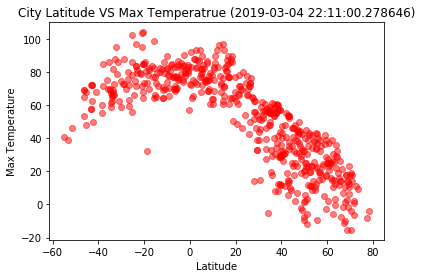

<Figure size 432x288 with 0 Axes>

In [34]:
plt.scatter(we_df["Lat"], we_df["Max Temp"], color = "r", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude VS Max Temperatrue ({datetime.now()})")
plt.show()
plt.savefig("LVT.png")

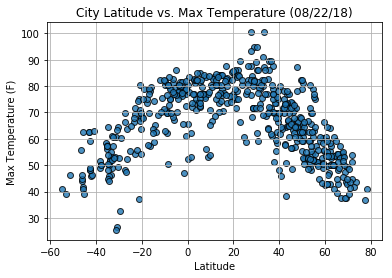

#### Latitude vs. Humidity Plot

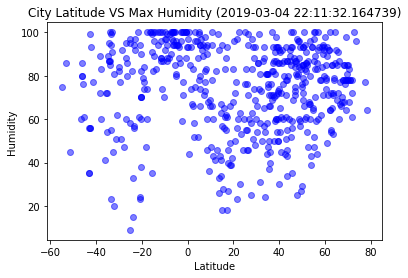

In [35]:
plt.scatter(we_df["Lat"], we_df["Humidity"], color = "b", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude VS Max Humidity ({datetime.now()})")
plt.savefig("LVH.png")
plt.show()

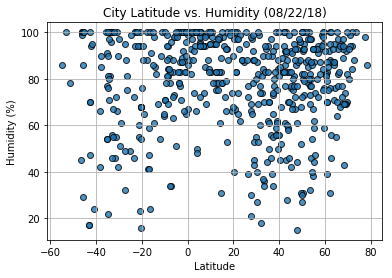

#### Latitude vs. Cloudiness Plot

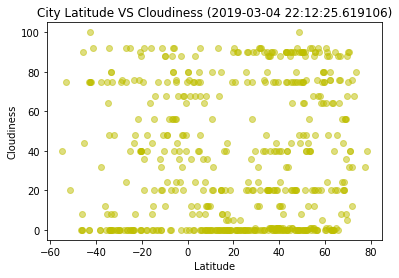

In [36]:
plt.scatter(we_df["Lat"], we_df["Cloudiness"], color = "y", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude VS Cloudiness ({datetime.now()})")
plt.savefig("LVC.png")
plt.show()

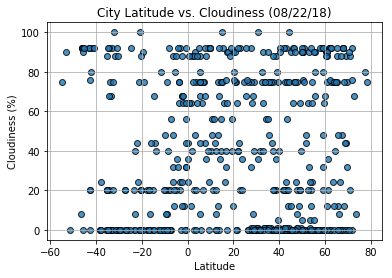

#### Latitude vs. Wind Speed Plot

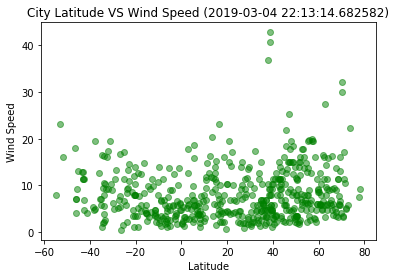

In [37]:
plt.scatter(we_df["Lat"], we_df["Wind Speed"], color = "g", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude VS Wind Speed ({datetime.now()})")
plt.savefig("LVW.png")
plt.show()

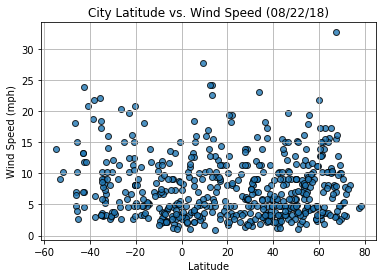

In [ ]:
#Observations
#For most cities that on different Latitude, Wind Speed is below 10 mph.
#Cities that have the Latitude between -20 and 20 tend to experience higher temperature.
#Cloudiness of cities have no realtion with the Latitude of cities.